#### Loading data

In [1]:
import matplotlib.pyplot as plt
import json

# Loading data
max_chain_size = 9
chain_sizes = list(range(3, max_chain_size+1))

data = []
for num_spins in chain_sizes:
    filename = '{}_spins-15_steps-30_trajectories-dt=0.5.json'.format(num_spins)
    with open(filename, 'r') as file:
        loaded_dict = json.load(file)
    data.append(loaded_dict)

#### Plotting energies

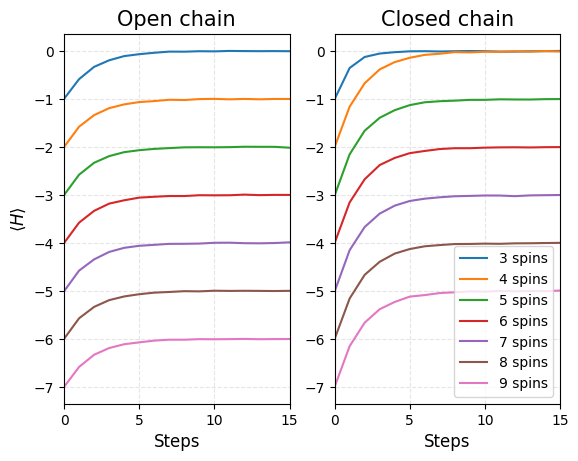

In [2]:
num_steps = data[0]['num_steps']

# Energy pers steps
energy_fig, (ax1, ax2) = plt.subplots(1, 2)
for i in range(len(data)):
    ax1.plot(list(range(num_steps+1)), data[i]['Open chain'], label='{} spins'.format(data[i]['num_spins']))
    ax2.plot(list(range(num_steps+1)), data[i]['Closed chain'], label='{} spins'.format(data[i]['num_spins']))

# Customizing ax1
ax1.set_title('Open chain', fontsize=15)
ax1.set_xlabel('Steps', fontsize=12)
ax1.set_ylabel(r'$\langle H \rangle$', fontsize=12)
ax1.set_xlim(0, num_steps)
ax1.grid(True, linestyle='--', color='gray', alpha=0.2)

# Customizing ax2
ax2.set_title('Closed chain', fontsize=15)
ax2.set_xlabel('Steps', fontsize=12)
ax2.set_xlim(0, num_steps)
ax2.grid(True, linestyle='--', color='gray', alpha=0.2)

# Finishing plot
plt.legend(loc='lower right')
plt.show()

#### Plotting stabilization

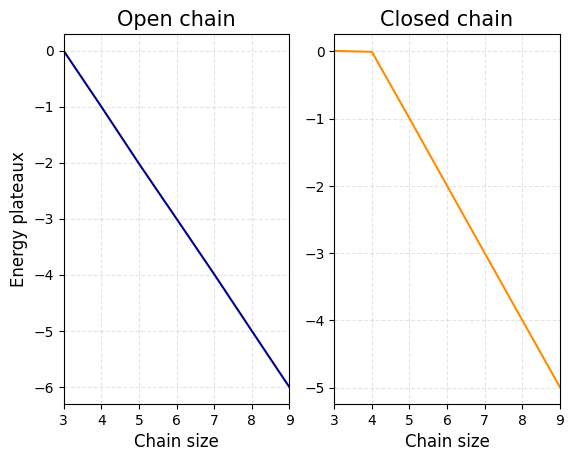

In [3]:
# Plateaux
open_chain_plateaux = [ x['Open chain'][num_steps] for x in data ]
closed_chain_plateaux = [ x['Closed chain'][num_steps] for x in data ]

plateaux_fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(chain_sizes, open_chain_plateaux, color='darkblue')
ax2.plot(chain_sizes, closed_chain_plateaux, color='darkorange')

# Customizing ax1
ax1.set_title('Open chain', fontsize=15)
ax1.set_xlabel('Chain size', fontsize=12)
ax1.set_ylabel('Energy plateaux', fontsize=12)
ax1.set_xlim(3, max_chain_size)
ax1.set_xticks(chain_sizes)
ax1.grid(True, linestyle='--', color='gray', alpha=0.2)

# Customizing ax2
ax2.set_title('Closed chain', fontsize=15)
ax2.set_xlabel('Chain size', fontsize=12)
ax2.set_xlim(3, max_chain_size)
ax2.set_xticks(chain_sizes)
ax2.grid(True, linestyle='--', color='gray', alpha=0.2)

# Finishing plot
plt.show()

The graphs suggest that the plateaux energies, $\langle H \rangle^pp$, have the form
\begin{equation}
\begin{split}
    \langle H \rangle_{open}^p &= - n \Delta\\
    \langle H \rangle_{closed}^p &= ( \delta_{n, 3} + \delta_{n, 4} - 1 ) n \Delta
\end{split}
\end{equation}
where $n = 3, 4, 5, ...$ is the chain size and $\Delta \equiv J_z/J_x$.